In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

In [153]:
filepath = '../data/nfl-big-data-bowl-data/week17.csv'

### Find how many plays for a team per week and extrapolate to the entire season

In [154]:
df = pd.read_csv(filepath)

In [155]:
df.iloc[:, 1:3]

,x,y
0,89.89,26.42
1,84.31,33.65
2,89.76,24.50
3,70.86,22.92
4,86.51,31.35
...,...,...
1049260,95.77,11.20
1049261,101.94,14.60
1049262,102.68,0.94
1049263,105.82,0.71


In [156]:
dfNum = df.iloc[:, 0:3]
dfNum

,time,x,y
0,2018-12-30T18:03:23.400Z,89.89,26.42
1,2018-12-30T18:03:23.400Z,84.31,33.65
2,2018-12-30T18:03:23.400Z,89.76,24.50
3,2018-12-30T18:03:23.400Z,70.86,22.92
4,2018-12-30T18:03:23.400Z,86.51,31.35
...,...,...,...
1049260,2018-12-31T04:23:24.200Z,95.77,11.20
1049261,2018-12-31T04:23:24.200Z,101.94,14.60
1049262,2018-12-31T04:23:24.200Z,102.68,0.94
1049263,2018-12-31T04:23:24.200Z,105.82,0.71


In [157]:
a = dfNum.groupby('time').transform(lambda x: (x - x.mean()) / x.std())

In [158]:
df.iloc[:, 1:3] = a

In [159]:
df

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-12-30T18:03:23.400Z,1.355465,0.022127,0.07,0.07,0.01,273.39,236.96,None,79860.0,Matthew Stafford,9.0,QB,1,away,2018123002,51,left,NaN
1,2018-12-30T18:03:23.400Z,0.246245,1.029872,0.08,0.08,0.02,143.39,359.18,None,80431.0,Clay Matthews,52.0,OLB,1,home,2018123002,51,left,NaN
2,2018-12-30T18:03:23.400Z,1.329623,-0.245490,0.10,0.05,0.00,292.21,202.78,None,497149.0,LeGarrette Blount,29.0,RB,1,away,2018123002,51,left,FLAT
3,2018-12-30T18:03:23.400Z,-2.427412,-0.465716,0.10,0.10,0.01,84.72,279.02,None,2506789.0,Tramon Williams,38.0,CB,1,home,2018123002,51,left,NaN
4,2018-12-30T18:03:23.400Z,0.683572,0.709289,0.00,0.00,0.00,279.50,61.20,None,2540203.0,Levine Toilolo,87.0,TE,1,away,2018123002,51,left,FLAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049260,2018-12-31T04:23:24.200Z,0.346020,-0.168487,7.15,1.75,0.73,103.97,118.54,None,2558942.0,Anthony Firkser,86.0,TE,102,home,2018123011,4261,left,POST
1049261,2018-12-31T04:23:24.200Z,0.844257,0.072643,5.63,2.24,0.57,139.23,119.97,None,2558976.0,Kenny Moore,23.0,CB,102,away,2018123011,4261,left,NaN
1049262,2018-12-31T04:23:24.200Z,0.904013,-0.896131,2.34,1.67,0.24,164.79,152.29,None,2560789.0,Darius Leonard,53.0,LB,102,away,2018123011,4261,left,NaN
1049263,2018-12-31T04:23:24.200Z,1.157572,-0.912443,2.28,3.53,0.25,284.72,93.44,None,2561521.0,Cameron Batson,17.0,WR,102,home,2018123011,4261,left,OUT


In [160]:
#df['x'] = (df['x'] - np.mean(df['x']))/np.std(df['x'])
#df['y'] = (df['y'] - np.mean(df['y']))/np.std(df['y'])
df['s'] = (df['s'] - np.mean(df['s']))/np.std(df['s'])
df['a'] = (df['a'] - np.mean(df['a']))/np.std(df['a'])
df['dis'] = (df['dis'] - np.mean(df['dis']))/np.std(df['dis'])
df['o'] = (df['o'] - np.mean(df['o']))/np.std(df['o'])
df['dir'] = (df['dir'] - np.mean(df['dir']))/np.std(df['dir'])

In [161]:
for i in ['s', 'a', 'dis', 'o', 'dir']:
    print(np.mean(df[i]))
    print(np.std(df[i]))

-1.7687994878365994e-16
0.9999999999999999
-1.250755227425038e-16
0.9999999999999996
3.256974738399276e-16
1.0000000000000004
2.5358985640897985e-16
1.0
-9.88894553139625e-16
1.0000000000000002


In [162]:
df.to_csv('standardized_week_17_by_play.csv')

In [16]:
df[df['event'] == 'pass_forward']

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
490,2018-09-07T01:07:18.099Z,1.502046,-0.001378,-0.825503,0.022181,-0.792680,1.756140,1.477702,pass_forward,310.0,Matt Ryan,2.0,QB,36,away,2018090600,75,left,NaN
491,2018-09-07T01:07:18.099Z,1.036453,1.029450,0.823883,1.354008,0.705609,1.149824,1.333867,pass_forward,79848.0,Malcolm Jenkins,27.0,SS,36,home,2018090600,75,left,NaN
492,2018-09-07T01:07:18.099Z,0.870829,1.616710,-0.027186,2.756865,0.054179,-0.242638,1.132828,pass_forward,2495454.0,Julio Jones,11.0,WR,36,away,2018090600,75,left,HITCH
493,2018-09-07T01:07:18.099Z,1.084577,-0.727866,0.117003,-0.782834,0.086750,-1.502933,0.339064,pass_forward,2495613.0,Corey Graham,24.0,FS,36,home,2018090600,75,left,NaN
494,2018-09-07T01:07:18.099Z,0.949430,0.692981,1.112262,-0.475034,1.031324,0.819359,0.889056,pass_forward,2533040.0,Mohamed Sanu,12.0,WR,36,away,2018090600,75,left,HITCH
495,2018-09-07T01:07:18.099Z,0.427293,0.358296,-0.090489,0.377335,-0.076107,-0.996015,1.308616,pass_forward,2534832.0,Rodney McLeod,23.0,FS,36,home,2018090600,75,left,NaN
496,2018-09-07T01:07:18.099Z,1.396977,0.045032,0.257676,0.720650,0.217036,1.126886,1.467602,pass_forward,2543583.0,Devonta Freeman,24.0,RB,36,away,2018090600,75,left,NaN
497,2018-09-07T01:07:18.099Z,1.087785,0.601054,0.197890,-0.309295,0.151893,-1.264220,1.263066,pass_forward,2552315.0,Jordan Hicks,58.0,MLB,36,home,2018090600,75,left,NaN
498,2018-09-07T01:07:18.099Z,0.823508,-0.606487,-0.069388,-0.782834,-0.076107,-1.005845,0.762508,pass_forward,2552689.0,Ronald Darby,21.0,CB,36,home,2018090600,75,left,NaN
499,2018-09-07T01:07:18.099Z,0.704001,1.618495,0.524954,0.099131,0.477608,0.025766,0.934703,pass_forward,2555383.0,Jalen Mills,31.0,CB,36,home,2018090600,75,left,NaN


In [209]:
len(df[df['gameId'] == 2018090600]['playId'].value_counts())

89

(array([5.236e+03, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 2.700e+01]),
 array([  1. ,  15.9,  30.8,  45.7,  60.6,  75.5,  90.4, 105.3, 120.2,
        135.1, 150. ]),
 <BarContainer object of 10 artists>)

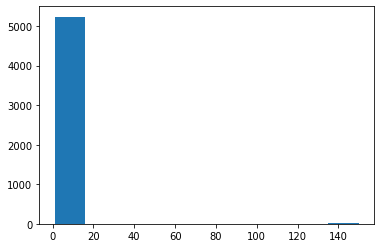

In [210]:
plt.hist(df[df['gameId'] == 2018090600]['time'].value_counts())

In [211]:
df[(df['playId'] == 1869) & (df['gameId'] == 2018090600)]['event'].unique()

array(['None', 'ball_snap', 'pass_forward', 'pass_arrived',
       'pass_outcome_caught', 'out_of_bounds'], dtype=object)

In [212]:
df[(df['playId'] == 1869) & (df['gameId'] == 2018090600) & (df['time'] == '2018-09-07T02:23:08.000Z')]

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
30043,2018-09-07T02:23:08.000Z,15.98,30.25,0.00,0.00,0.01,96.62,81.21,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,1869,right,NaN
30044,2018-09-07T02:23:08.000Z,25.43,37.04,0.78,0.36,0.08,255.54,6.16,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,1869,right,NaN
30045,2018-09-07T02:23:08.000Z,19.82,17.74,0.00,0.00,0.00,83.12,58.54,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,1869,right,OUT
30046,2018-09-07T02:23:08.000Z,19.33,15.36,0.00,0.00,0.00,86.16,144.41,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,1869,right,HITCH
30047,2018-09-07T02:23:08.000Z,36.66,26.83,0.02,0.02,0.00,280.70,125.02,None,2534832.0,Rodney McLeod,23.0,FS,1,home,2018090600,1869,right,NaN
30048,2018-09-07T02:23:08.000Z,16.21,28.17,0.00,0.00,0.00,86.12,26.33,None,2543583.0,Devonta Freeman,24.0,RB,1,away,2018090600,1869,right,NaN
30049,2018-09-07T02:23:08.000Z,24.45,27.92,2.04,0.63,0.21,279.30,133.35,None,2552315.0,Jordan Hicks,58.0,MLB,1,home,2018090600,1869,right,NaN
30050,2018-09-07T02:23:08.000Z,29.73,39.87,0.06,0.11,0.02,260.69,44.49,None,2552689.0,Ronald Darby,21.0,CB,1,home,2018090600,1869,right,NaN
30051,2018-09-07T02:23:08.000Z,27.02,14.55,0.36,0.32,0.04,261.56,51.41,None,2555383.0,Jalen Mills,31.0,CB,1,home,2018090600,1869,right,NaN
30052,2018-09-07T02:23:08.000Z,19.24,36.10,0.19,0.20,0.02,88.53,55.34,None,2555415.0,Austin Hooper,81.0,TE,1,away,2018090600,1869,right,HITCH


In [213]:
df[df['time'] == '2018-09-11T05:29:39.900Z']

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
986007,2018-09-11T05:29:39.900Z,20.69,5.20,0.15,1.27,0.02,42.27,5.43,None,1032.0,Jordy Nelson,82.0,WR,65,home,2018091001,4192,left,GO
986008,2018-09-11T05:29:39.900Z,30.80,44.49,2.87,2.13,0.28,139.42,281.86,None,1302.0,Aqib Talib,21.0,CB,65,away,2018091001,4192,left,NaN
986009,2018-09-11T05:29:39.900Z,36.98,44.39,0.82,0.67,0.08,230.30,235.57,None,2534241.0,Derek Carrier,85.0,TE,65,home,2018091001,4192,left,HITCH
986010,2018-09-11T05:29:39.900Z,29.06,27.72,4.15,1.62,0.42,357.62,341.48,None,2540197.0,Nickell Robey-Coleman,23.0,CB,65,away,2018091001,4192,left,NaN
986011,2018-09-11T05:29:39.900Z,44.47,29.92,3.62,0.53,0.36,279.24,276.16,None,2543487.0,Dominique Easley,91.0,OLB,65,away,2018091001,4192,left,NaN
986012,2018-09-11T05:29:39.900Z,25.02,36.59,4.65,1.28,0.47,49.06,12.98,None,2543492.0,Lamarcus Joyner,20.0,FS,65,away,2018091001,4192,left,NaN
986013,2018-09-11T05:29:39.900Z,46.48,30.70,1.43,0.84,0.14,286.98,270.58,None,2543499.0,Derek Carr,4.0,QB,65,home,2018091001,4192,left,NaN
986014,2018-09-11T05:29:39.900Z,32.43,38.52,3.36,2.34,0.35,318.15,315.18,None,2550597.0,Seth Roberts,10.0,WR,65,home,2018091001,4192,left,SLANT
986015,2018-09-11T05:29:39.900Z,31.66,27.20,2.24,1.38,0.23,338.10,351.64,None,2552487.0,Amari Cooper,89.0,WR,65,home,2018091001,4192,left,IN
986016,2018-09-11T05:29:39.900Z,23.66,20.13,2.63,2.49,0.27,24.32,12.77,None,2552488.0,Marcus Peters,22.0,CB,65,away,2018091001,4192,left,NaN


(array([7., 2., 1., 4., 2., 0., 0., 0., 0., 2.]),
 array([4.800000e+01, 1.899090e+04, 3.793380e+04, 5.687670e+04,
        7.581960e+04, 9.476250e+04, 1.137054e+05, 1.326483e+05,
        1.515912e+05, 1.705341e+05, 1.894770e+05]),
 <BarContainer object of 10 artists>)

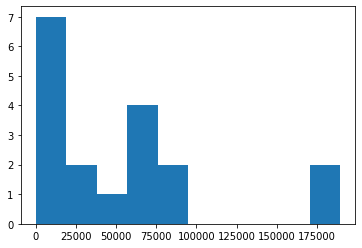

In [214]:
plt.hist(df['position'].value_counts())

In [215]:
df['position'].value_counts()

CB     189477
WR     180448
OLB     83523
TE      82672
FS      68416
QB      67025
RB      65967
SS      60306
ILB     52186
MLB     26545
LB      20549
DB      12850
S        3427
FB       2794
HB       2168
DL        592
DE        116
NT         48
Name: position, dtype: int64

In [216]:
defSet = {'CB', 'OLB', 'FS', 'SS', 'ILB', 'MLB', 'LB', 'DB', 'S', 'DL', 'DE', 'NT'}


In [217]:
def positionScreening(dataSample, positionSet, otherMask = True):
    retArr = []    
    for i in dataSample:
        if otherMask:
            retArr.append(i in positionSet)
        else:
            retArr.append(not i in positionSet)
    return retArr

In [218]:
df[df['time'] == '2018-09-11T05:29:39.900Z']

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
986007,2018-09-11T05:29:39.900Z,20.69,5.20,0.15,1.27,0.02,42.27,5.43,None,1032.0,Jordy Nelson,82.0,WR,65,home,2018091001,4192,left,GO
986008,2018-09-11T05:29:39.900Z,30.80,44.49,2.87,2.13,0.28,139.42,281.86,None,1302.0,Aqib Talib,21.0,CB,65,away,2018091001,4192,left,NaN
986009,2018-09-11T05:29:39.900Z,36.98,44.39,0.82,0.67,0.08,230.30,235.57,None,2534241.0,Derek Carrier,85.0,TE,65,home,2018091001,4192,left,HITCH
986010,2018-09-11T05:29:39.900Z,29.06,27.72,4.15,1.62,0.42,357.62,341.48,None,2540197.0,Nickell Robey-Coleman,23.0,CB,65,away,2018091001,4192,left,NaN
986011,2018-09-11T05:29:39.900Z,44.47,29.92,3.62,0.53,0.36,279.24,276.16,None,2543487.0,Dominique Easley,91.0,OLB,65,away,2018091001,4192,left,NaN
986012,2018-09-11T05:29:39.900Z,25.02,36.59,4.65,1.28,0.47,49.06,12.98,None,2543492.0,Lamarcus Joyner,20.0,FS,65,away,2018091001,4192,left,NaN
986013,2018-09-11T05:29:39.900Z,46.48,30.70,1.43,0.84,0.14,286.98,270.58,None,2543499.0,Derek Carr,4.0,QB,65,home,2018091001,4192,left,NaN
986014,2018-09-11T05:29:39.900Z,32.43,38.52,3.36,2.34,0.35,318.15,315.18,None,2550597.0,Seth Roberts,10.0,WR,65,home,2018091001,4192,left,SLANT
986015,2018-09-11T05:29:39.900Z,31.66,27.20,2.24,1.38,0.23,338.10,351.64,None,2552487.0,Amari Cooper,89.0,WR,65,home,2018091001,4192,left,IN
986016,2018-09-11T05:29:39.900Z,23.66,20.13,2.63,2.49,0.27,24.32,12.77,None,2552488.0,Marcus Peters,22.0,CB,65,away,2018091001,4192,left,NaN


In [219]:
'CB' in defSet

True

In [220]:
defense = df[(df['time'] == '2018-09-07T01:07:14.599Z')][(positionScreening(df[df['time'] == '2018-09-07T01:07:14.599Z']['position'], defSet))]
offense = df[(df['time'] == '2018-09-07T01:07:14.599Z')][(positionScreening(df[df['time'] == '2018-09-07T01:07:14.599Z']['position'], defSet, otherMask = False))]

In [221]:
defense

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
5,2018-09-07T01:07:14.599Z,73.64,28.70,0.03,0.02,0.01,103.05,219.41,None,2534832.0,Rodney McLeod,23.0,FS,1,home,2018090600,75,left,NaN
7,2018-09-07T01:07:14.599Z,86.48,31.12,0.09,0.03,0.04,95.90,33.36,None,2552315.0,Jordan Hicks,58.0,MLB,1,home,2018090600,75,left,NaN
8,2018-09-07T01:07:14.599Z,82.67,20.53,0.03,0.07,0.01,81.14,174.57,None,2552689.0,Ronald Darby,21.0,CB,1,home,2018090600,75,left,NaN
9,2018-09-07T01:07:14.599Z,84.00,43.49,0.14,0.05,0.01,108.23,110.32,None,2555383.0,Jalen Mills,31.0,CB,1,home,2018090600,75,left,NaN
11,2018-09-07T01:07:14.599Z,85.63,26.59,0.03,0.04,0.02,87.69,38.80,None,2558175.0,Nate Gerry,47.0,LB,1,home,2018090600,75,left,NaN


In [222]:
offense

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH
6,2018-09-07T01:07:14.599Z,98.25,26.63,0.01,0.01,0.00,265.88,194.51,None,2543583.0,Devonta Freeman,24.0,RB,1,away,2018090600,75,left,NaN
10,2018-09-07T01:07:14.599Z,91.29,21.83,0.01,0.02,0.01,250.34,151.83,None,2555415.0,Austin Hooper,81.0,TE,1,away,2018090600,75,left,OUT
12,2018-09-07T01:07:14.599Z,95.13,26.71,0.01,0.01,0.01,250.10,237.27,None,2559033.0,Ricky Ortiz,30.0,FB,1,away,2018090600,75,left,FLAT
13,2018-09-07T01:07:14.599Z,90.11,26.85,0.00,0.00,0.00,NaN,NaN,None,NaN,Football,NaN,NaN,1,football,2018090600,75,left,NaN


<AxesSubplot:xlabel='y', ylabel='x'>

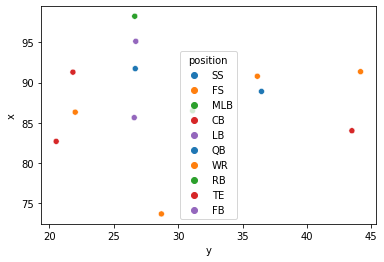

In [233]:
sns.scatterplot(data = defense,x = 'y', y = 'x', hue = 'position')
sns.scatterplot(data = offense,x = 'y', y = 'x', hue = 'position')

In [224]:
from sklearn.neighbors import KNeighborsClassifier

In [225]:
model = KNeighborsClassifier(n_neighbors= 1)
model.fit(offense[['x', 'y']].iloc[:-1], offense['position'].iloc[:-1])

KNeighborsClassifier(n_neighbors=1)

In [226]:
dist, idx = model.kneighbors(X = defense[['x', 'y']], n_neighbors=1, return_distance = True)

In [227]:
model.predict(X = defense[['x', 'y']])

array(['WR', 'TE', 'QB', 'WR', 'TE', 'WR', 'QB'], dtype=object)

In [228]:
dist

array([[ 1.91689854],
       [ 4.98325195],
       [18.20354361],
       [ 6.6174693 ],
       [ 8.7174767 ],
       [ 7.38047424],
       [ 6.10052457]])

In [235]:
offense

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,distanceToNearest
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN,1.916899
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN,4.983252
5,2018-09-07T01:07:14.599Z,73.64,28.70,0.03,0.02,0.01,103.05,219.41,None,2534832.0,Rodney McLeod,23.0,FS,1,home,2018090600,75,left,NaN,18.203544
7,2018-09-07T01:07:14.599Z,86.48,31.12,0.09,0.03,0.04,95.90,33.36,None,2552315.0,Jordan Hicks,58.0,MLB,1,home,2018090600,75,left,NaN,6.617469
8,2018-09-07T01:07:14.599Z,82.67,20.53,0.03,0.07,0.01,81.14,174.57,None,2552689.0,Ronald Darby,21.0,CB,1,home,2018090600,75,left,NaN,8.717477
9,2018-09-07T01:07:14.599Z,84.00,43.49,0.14,0.05,0.01,108.23,110.32,None,2555383.0,Jalen Mills,31.0,CB,1,home,2018090600,75,left,NaN,7.380474
11,2018-09-07T01:07:14.599Z,85.63,26.59,0.03,0.04,0.02,87.69,38.80,None,2558175.0,Nate Gerry,47.0,LB,1,home,2018090600,75,left,NaN,6.100525


In [230]:
for i in idx:
    print(offense.iloc[i, 10:13])

    displayName  jerseyNumber position
4  Mohamed Sanu          12.0       WR
      displayName  jerseyNumber position
10  Austin Hooper          81.0       TE
  displayName  jerseyNumber position
0   Matt Ryan           2.0       QB
    displayName  jerseyNumber position
4  Mohamed Sanu          12.0       WR
      displayName  jerseyNumber position
10  Austin Hooper          81.0       TE
   displayName  jerseyNumber position
2  Julio Jones          11.0       WR
  displayName  jerseyNumber position
0   Matt Ryan           2.0       QB


In [89]:
defense

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
986008,2018-09-11T05:29:39.900Z,30.80,44.49,2.87,2.13,0.28,139.42,281.86,None,1302.0,Aqib Talib,21.0,CB,65,away,2018091001,4192,left,NaN
986010,2018-09-11T05:29:39.900Z,29.06,27.72,4.15,1.62,0.42,357.62,341.48,None,2540197.0,Nickell Robey-Coleman,23.0,CB,65,away,2018091001,4192,left,NaN
986011,2018-09-11T05:29:39.900Z,44.47,29.92,3.62,0.53,0.36,279.24,276.16,None,2543487.0,Dominique Easley,91.0,OLB,65,away,2018091001,4192,left,NaN
986012,2018-09-11T05:29:39.900Z,25.02,36.59,4.65,1.28,0.47,49.06,12.98,None,2543492.0,Lamarcus Joyner,20.0,FS,65,away,2018091001,4192,left,NaN
986016,2018-09-11T05:29:39.900Z,23.66,20.13,2.63,2.49,0.27,24.32,12.77,None,2552488.0,Marcus Peters,22.0,CB,65,away,2018091001,4192,left,NaN
986017,2018-09-11T05:29:39.900Z,33.68,43.14,1.96,3.79,0.22,281.35,309.70,None,2556277.0,Marqui Christian,41.0,SS,65,away,2018091001,4192,left,NaN
986018,2018-09-11T05:29:39.900Z,36.02,40.21,0.81,1.52,0.09,308.07,234.06,None,2556593.0,Cory Littleton,58.0,ILB,65,away,2018091001,4192,left,NaN
986020,2018-09-11T05:29:39.900Z,34.13,40.86,0.15,0.72,0.02,6.17,267.87,None,2558183.0,John Johnson,43.0,SS,65,away,2018091001,4192,left,NaN
